In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objs as go
#import plotly.offline as py

import operator
import scipy

#from scipy.stats import norm
#import scipy.stats as st
import scipy.stats as stats

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [88]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

full = train.append(test, ignore_index = True,sort=False)

In [89]:
full.drop(['LotFrontage'],axis=1,inplace = True) 

full.MasVnrArea = full.MasVnrArea.fillna(0.) 

full.GarageCars = full.GarageCars.fillna(0.) 
full.GarageArea = full.GarageArea.fillna(0.) 
full.GarageYrBlt = full.GarageYrBlt.fillna(0.)

full.BsmtFinSF1 = full.BsmtFinSF1.fillna(0.)
full.BsmtFinSF2 = full.BsmtFinSF2.fillna(0.)
full.BsmtUnfSF = full.BsmtUnfSF.fillna(0.)
full.BsmtFullBath = full.BsmtFullBath.fillna(0.)
full.BsmtHalfBath = full.BsmtHalfBath.fillna(0.)
full.TotalBsmtSF = full.TotalBsmtSF.fillna(0.)


In [90]:
#full.drop(['PoolQC'],axis=1,inplace = True) 
full.drop(['MiscFeature'],axis=1,inplace = True) 
full.drop(['Alley'],axis=1,inplace = True)   
#full.drop(['Fence'],axis=1,inplace = True) 
full['PoolQC'] = full['PoolQC'].fillna(full['PoolQC'].mode()[0])  

full['Electrical'] = full['Electrical'].fillna(full['Electrical'].mode()[0])  

full['SaleType'] = full['SaleType'].fillna(full['SaleType'].mode()[0]) 

full['MSZoning'] = full['MSZoning'].fillna(full['MSZoning'].mode()[0])  

full['KitchenQual'] = full['KitchenQual'].fillna(full['KitchenQual'].mode()[0]) 



full['MasVnrType'] = full['MasVnrType'].fillna('Missing')    

full['Exterior1st'] = full['Exterior1st'].fillna(full['Exterior1st'].mode()[0])
full['Exterior2nd'] = full['Exterior2nd'].fillna(full['Exterior2nd'].mode()[0])    

full['Fence'] = full['Fence'].fillna('Missing')
full['FireplaceQu'] = full['FireplaceQu'].fillna('Missing')

full['Functional'] = full['Functional'].fillna('Typ')

full['GarageType'] = full['GarageType'].fillna('Missing')
full['GarageFinish'] = full['GarageFinish'].fillna('Missing')
full['GarageQual'] = full['GarageQual'].fillna('Missing')
full['GarageCond'] = full['GarageCond'].fillna('Missing')


    
full['BsmtExposure'] = full['BsmtExposure'].fillna('Missing')
full['BsmtFinType1'] = full['BsmtFinType1'].fillna('Missing')
full['BsmtFinType2'] = full['BsmtFinType2'].fillna('Missing')
full['BsmtQual'] = full['BsmtQual'].fillna('Missing')
full['BsmtCond'] = full['BsmtCond'].fillna('Missing')

full.drop(['Utilities'],axis=1,inplace = True) 
full.drop(['Street'],axis=1,inplace = True)

In [91]:
train = full[full.SalePrice.notnull()]
test = full[full.SalePrice.isnull()]

In [92]:
train = train[train['GrLivArea'] < 4500]
train = train[train['LotArea'] < 100000]
train = train[train['TotalBsmtSF'] < 3000]
train = train[train['1stFlrSF'] < 2500]
train = train[train['BsmtFinSF1'] < 2000]

In [93]:
numerical_feature = train.dtypes[train.dtypes != "object"].index

In [94]:
Categorical_features = []
for x in full.columns:
    if x not in numerical_feature:
        Categorical_features.append(x)

## EDA

After understanding different area of house and their effect on SalePrice

Lets start with understanding about our dependent variable distribution and as most of statisitcs or even machine learning techniques are depend on distribution of data

### Sale Price distribution

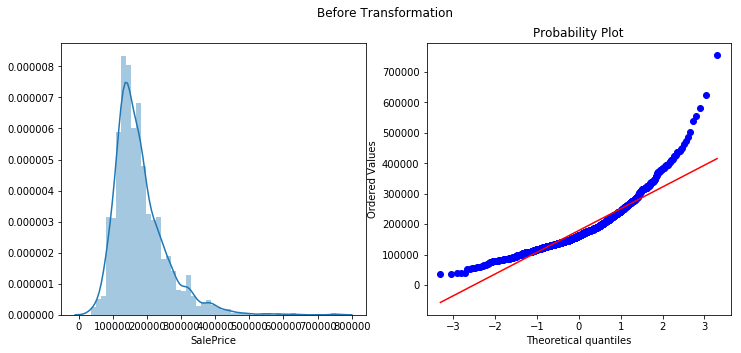

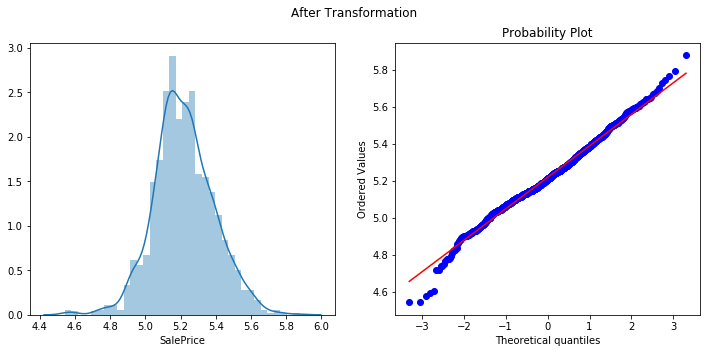

In [95]:
var = "SalePrice"

plt.figure(figsize=(12,5))
plt.suptitle("Before Transformation")
plt.subplot(1,2,1)
sns.distplot(train[var])
plt.subplot(1,2,2)
res = stats.probplot(train[var], plot=plt)


#train[var] = np.log10(train[var]) # convert saleprice to log sale price

plt.figure(figsize=(12,5))
plt.suptitle("After Transformation")
plt.subplot(1,2,1)
sns.distplot(np.log10(train[var]))
plt.subplot(1,2,2)
res = stats.probplot(np.log10(train[var]), plot=plt)

* after checking distribution of sale price it was clear that it is not not normally distributed(Right Skewed)
* Here after trying to convert sale price to noraml distribution by converting to log value

### Independent variables

Lets try to understand relationship of sale price with other independat varaible

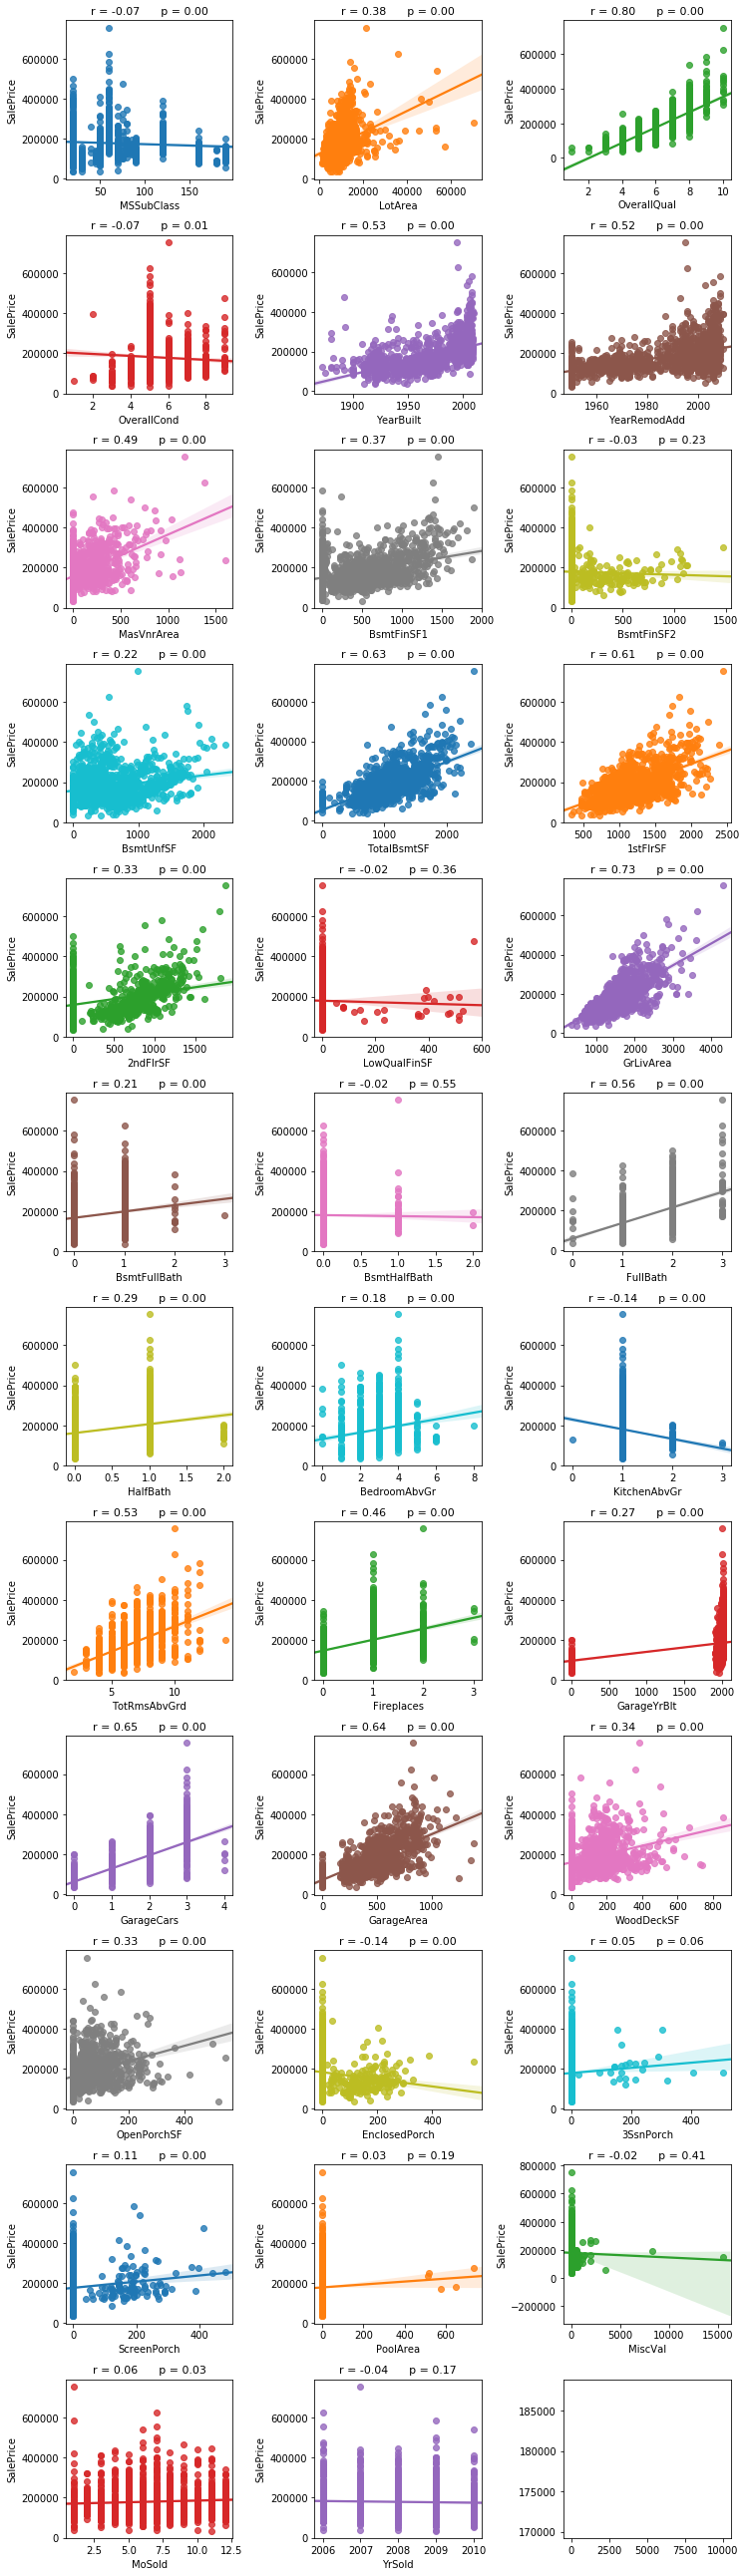

In [96]:
nr_rows = 12
nr_cols = 3
target = 'SalePrice'
# pearsonr require normal distribution so some might show wring as most of them are not normally distributed
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(numerical_feature)
li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log']
li_plot_num_feats = [c for c in list(numerical_feature) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(train[li_plot_num_feats[i]], train[target], ax = axs[r][c]) #Plot data and a linear regression model fit
            stp = stats.pearsonr(train[li_plot_num_feats[i]], train[target]) # Calculates a Pearson correlation coefficient and the p-value for testing non-correlation
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show() 

* The house price (SalePrice) shows a strong positive correlation with the Overall house quality **(OverallQual)**, the Ground living area **(GrLivArea)**, the 1st floor area **(1stFlrSF)** , the basement area **(TotalBsmtSF)** and the Size of garage **(GarageCars, GarageArea)**.

* We can clearly identify some relationships. Most of them seems to have a linear relationship with the SalePrice and if we look closely at the data we can see that a lot of data points are located on x = 0 which may indicate the absence of such feature in the house.

We'll visualize the distribution for each variable. Same as for the target variable, we'd want to tranform the variables that are not normally distributed 

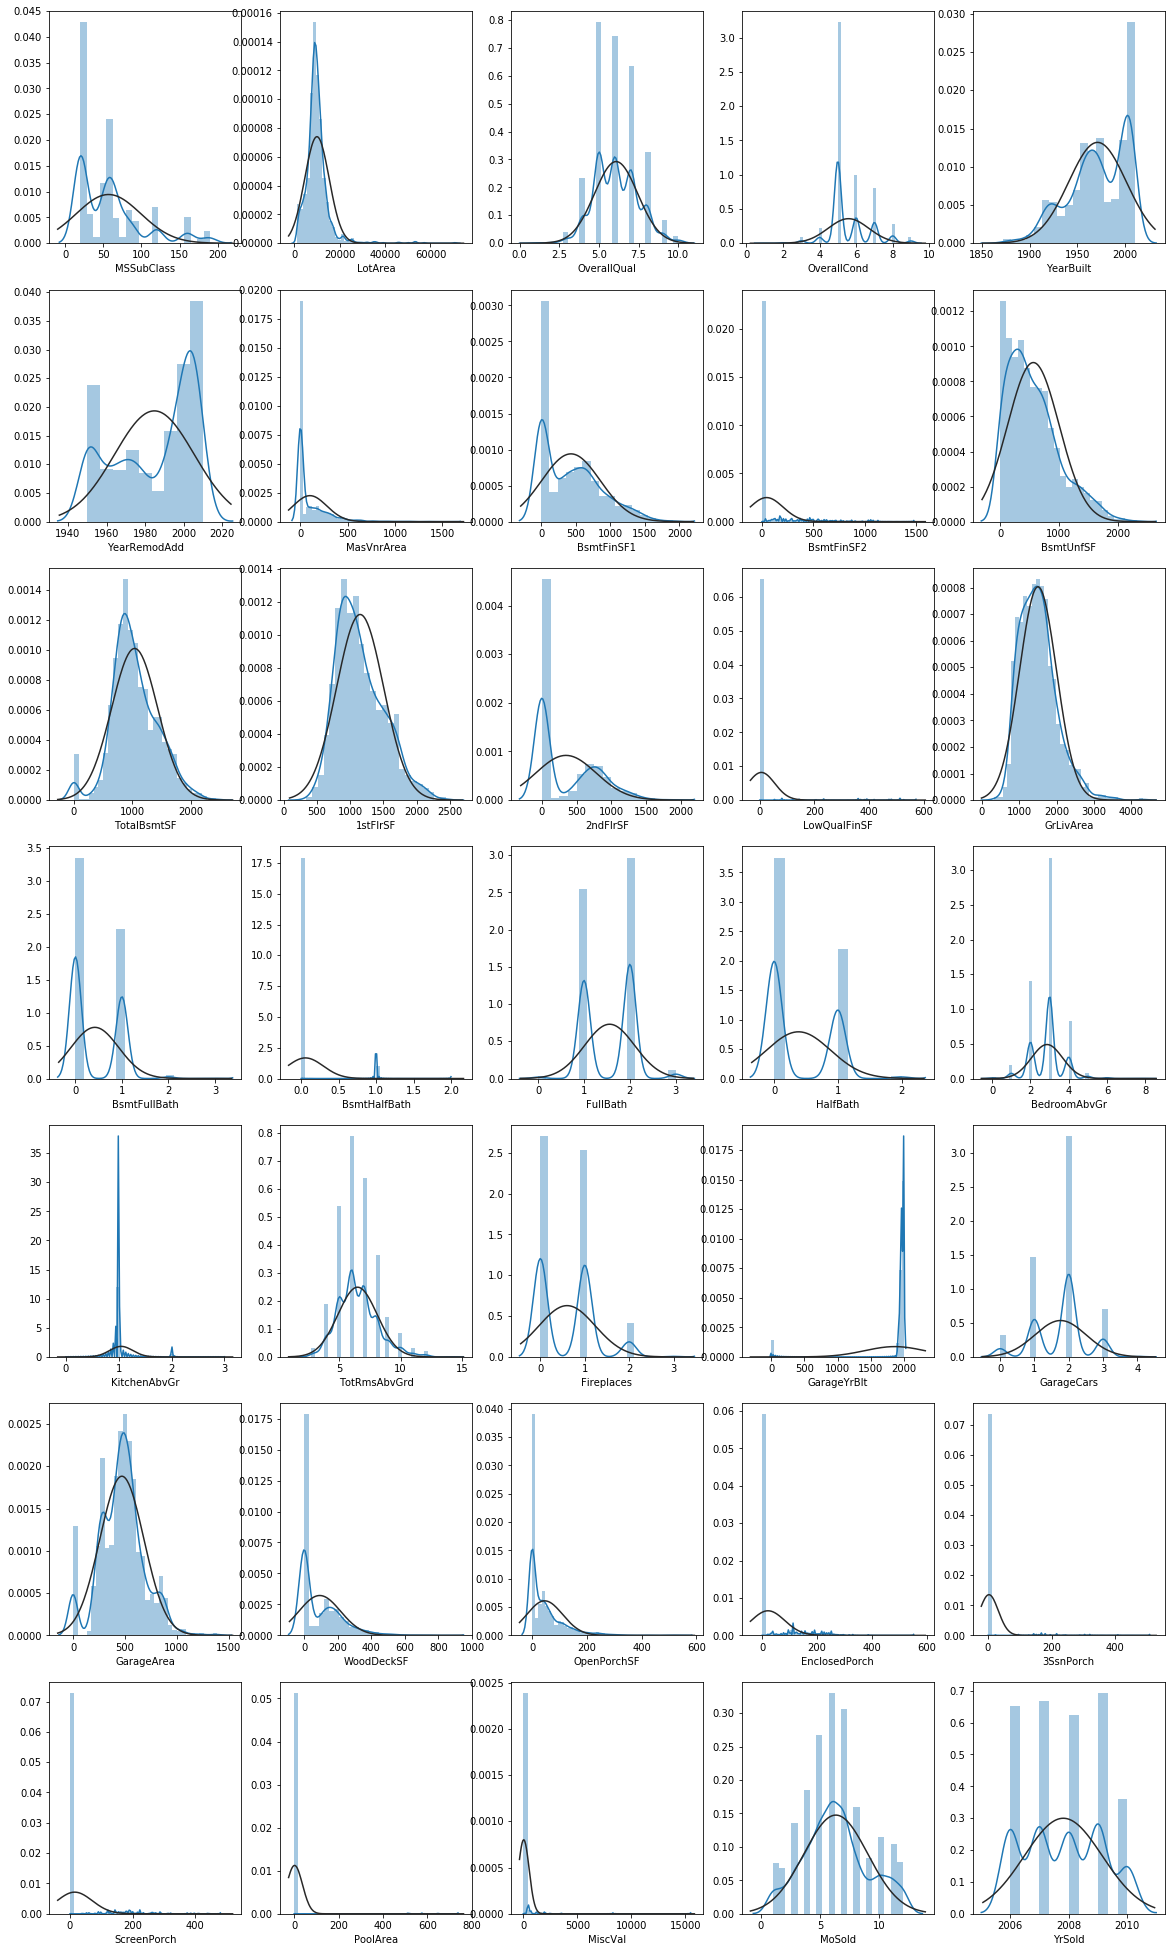

In [97]:
row = 7
col = 5
fig, ax = plt.subplots(row,col)  
fig.set_figheight(row*5)          
fig.set_figwidth(20)               

n = 0
for i in range(0,row):
    for j in range(0,col):
        sns.distplot(train[numerical_feature[n]], fit=norm, ax=ax[i][j]) # Provare: np.sqrt, np.log1p
        n += 1
        
# distplot a univariate distribution of observations  
# distplot plot the estimated PDF

* **Skewness** measures the **distortion of the bell shape** of the distribution. Positive values ​​indicate that the distribution tail is extended to the right, vice versa if negative
* From **-0.5 to 0.5: fairly symmetrical curve**. From -1 to -0.5 or +0.5 to +1.0 moderate asymmetry. Beyond this range: highly asymmetric      
* **Kurtosis** measures the **extreme tails of distribution**; it does not concern the shape of the figure. **A high value indicates that the distribution has many extreme values** ​​(probably anomalous)
        

##### Lets understand Skewness nad Kurtosis of some varibale which looks like normal distribution


Skew: 1.6773896045233962
kurtosis: 5.207918882786459


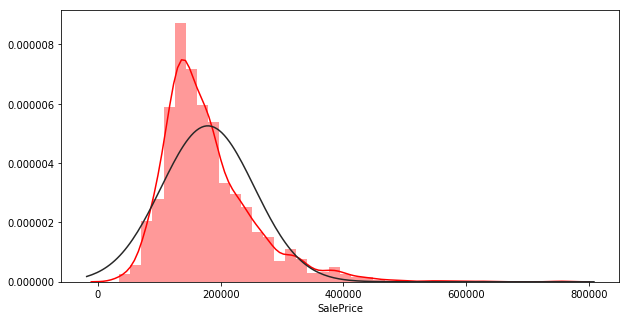

In [98]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
sns.distplot(train['SalePrice'], bins=40, color="r", fit=norm, kde=True)

print("Skew:",train['SalePrice'].skew())
print("kurtosis:",train['SalePrice'].kurtosis())

Skewness after Log Transform: 0.06086291419676083
kurtosis after Log Transform:: 0.735035933336146


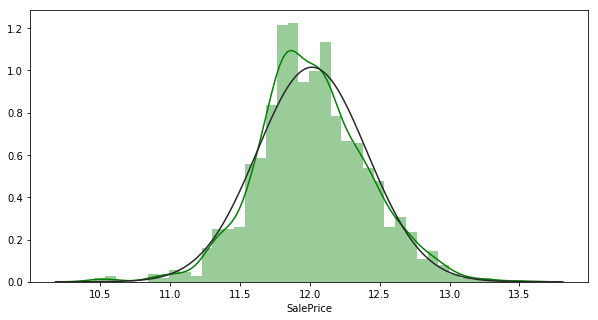

In [99]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
sns.distplot(np.log1p(train['SalePrice']), bins=40, color="g", fit=norm, kde=True)

print("Skewness after Log Transform:",np.log1p(train['SalePrice']).skew())
print("kurtosis after Log Transform::",np.log1p(train['SalePrice']).kurtosis())

* amount of skewness and kutosis is significantly reduced 

Skew : 3.975942054341596
kurtosis: 29.737519069325568


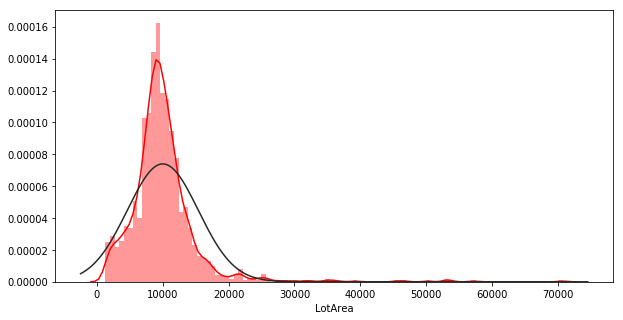

In [100]:

fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
sns.distplot(train['LotArea'], bins=100, color="r", fit=norm, kde=True)

print("Skew :",train['LotArea'].skew())
print("kurtosis:",train['LotArea'].kurtosis())

* LotArea has a very high kurtosis due to the values ​​to the right
* It is a signal of possible anomalous values

Skewness after Log Transform: -0.7238834559756298
kurtosis after Log Transform:: 2.893293259257656


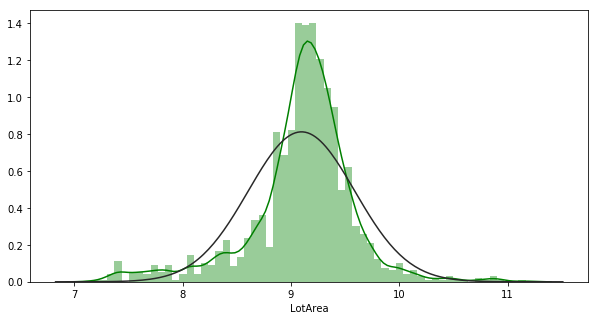

In [101]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
sns.distplot(np.log1p(train['LotArea']), bins=60, color="g", fit=norm, kde=True)

print("Skewness after Log Transform:",np.log1p(train['LotArea']).skew())
print("kurtosis after Log Transform::",np.log1p(train['LotArea']).kurtosis())

* now kurtosis value has drastically rediced and now tail is preety good compared to previous 

#### Let see other important column with nearly normal distribution

In [102]:
df = pd.DataFrame(columns=['Feature', 'Skew', 'Kurtosis'])
columns = [ 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']
for col in columns:
    df.loc[df.shape[0]] = [col, train[col].skew(), train[col].kurtosis()]
df

,Feature,Skew,Kurtosis
0,MasVnrArea,2.730027,10.780037
1,BsmtFinSF1,0.729147,-0.286106
2,BsmtUnfSF,0.918856,0.480840
3,TotalBsmtSF,0.201226,0.584536
4,1stFlrSF,0.662811,0.027181
5,2ndFlrSF,0.781220,-0.683574
6,GrLivArea,0.922740,1.563783


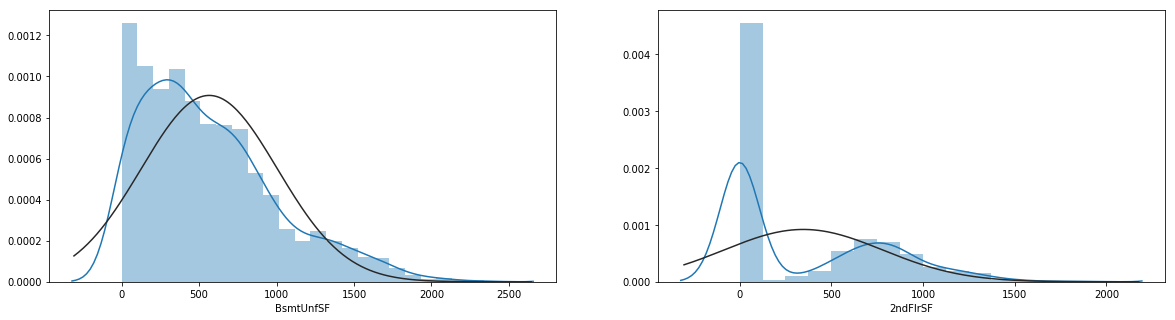

In [103]:
# How they appear
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
#sns.distplot(train['LotFrontage'], fit=norm, ax=ax[0])
sns.distplot(train['BsmtUnfSF'], fit=norm, ax=ax[0])
sns.distplot(train['2ndFlrSF'], fit=norm, ax=ax[1])

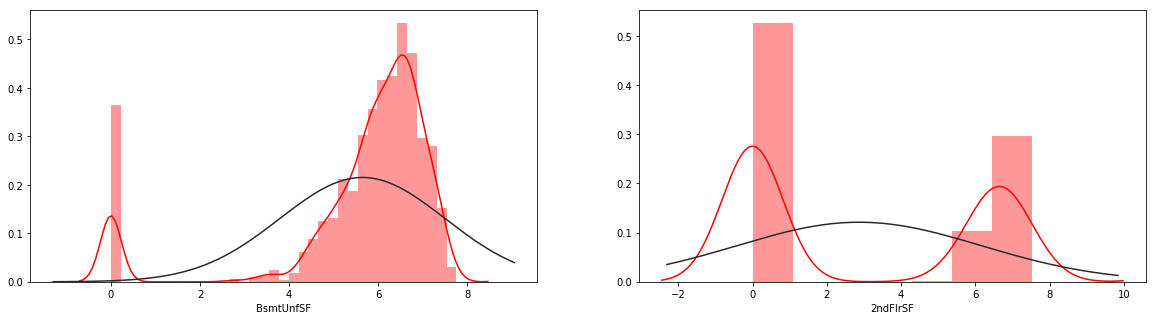

In [104]:
# Effettivamente la trasformazione non va bene, dunque evitiamo
fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
#sns.distplot(np.log1p(train['LotFrontage']), color='r', fit=norm, ax=ax[0])
sns.distplot(np.log1p(train['BsmtUnfSF']), color='r', fit=norm, ax=ax[0])
sns.distplot(np.log1p(train['2ndFlrSF']), color='r', fit=norm, ax=ax[1])

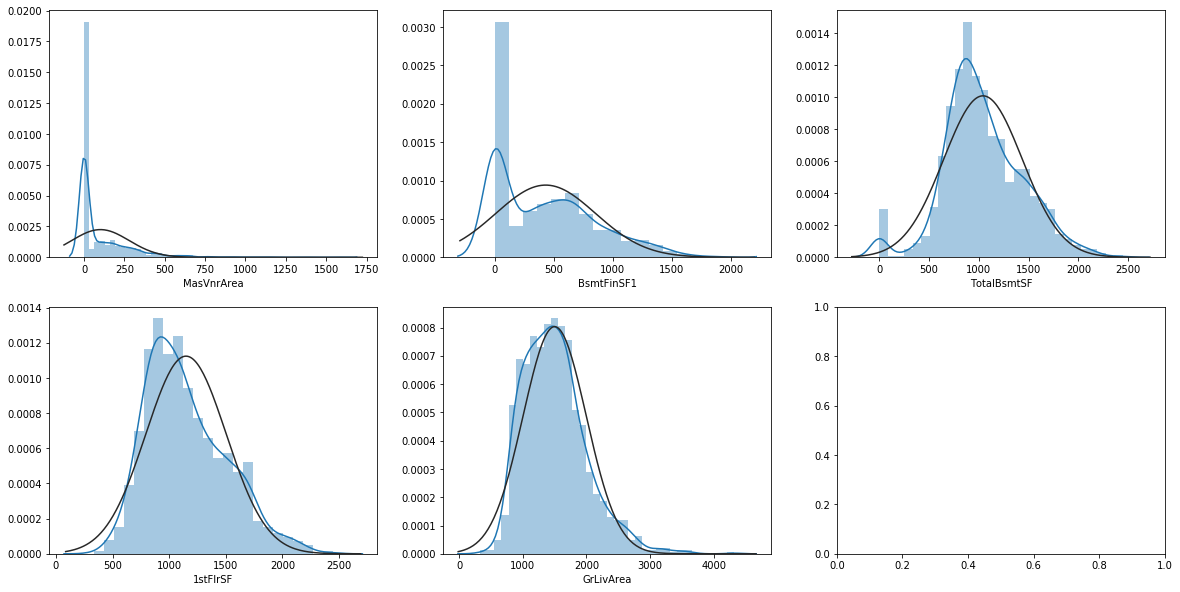

In [105]:
# Let's see the other remaining ones
fig, ax = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(20)
sns.distplot(train['MasVnrArea'], fit=norm, ax=ax[0][0])
sns.distplot(train['BsmtFinSF1'], fit=norm, ax=ax[0][1])
sns.distplot(train['TotalBsmtSF'], fit=norm, ax=ax[0][2])
sns.distplot(train['1stFlrSF'], fit=norm, ax=ax[1][0])
sns.distplot(train['GrLivArea'], fit=norm, ax=ax[1][1])
# sns.distplot(np.log1p(house_train['2ndFlrSF']), fit=norm, ax=ax[1][2])

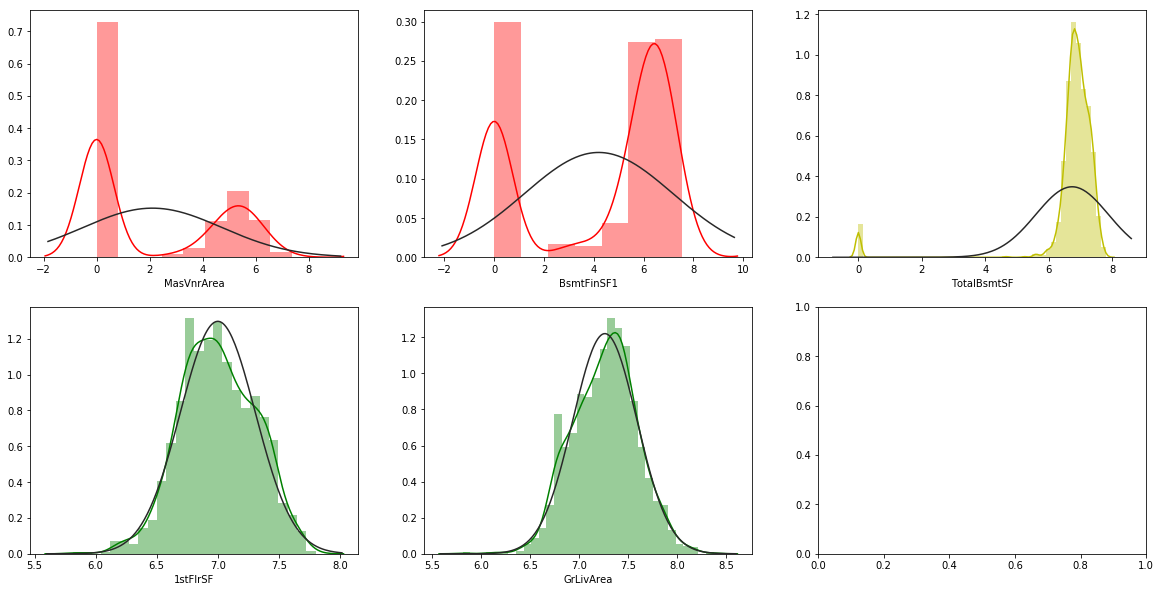

In [106]:
# TotalBsmtSF, 1stFlrSF and GrLivArea have the best forms, however we transform everything by trial
fig, ax = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(20)
sns.distplot(np.log1p(train['MasVnrArea']), color="r", fit=norm, ax=ax[0][0])
sns.distplot(np.log1p(train['BsmtFinSF1']), color="r", fit=norm, ax=ax[0][1])
sns.distplot(np.log1p(train['TotalBsmtSF']), color="y", fit=norm, ax=ax[0][2])
sns.distplot(np.log1p(train['1stFlrSF']), color="g", fit=norm, ax=ax[1][0])
sns.distplot(np.log1p(train['GrLivArea']), color="g", fit=norm, ax=ax[1][1])
# sns.distplot(np.log1p(house_train['2ndFlrSF']), fit=norm, ax=ax[1][2])


* 1st Floor and Living area (Green ) are quite good normally distributed
* Total Basement SF is not bad either
* not sure about basementFinsihSF! adn MasVnRArea

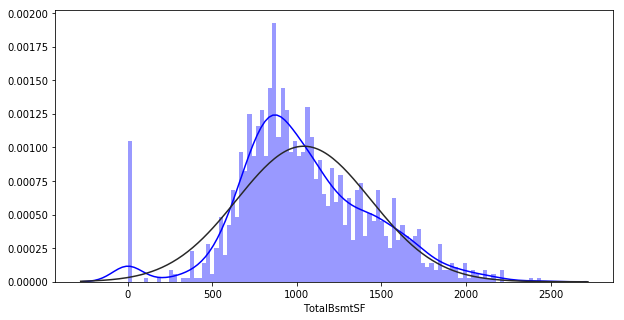

In [107]:
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
sns.distplot(train['TotalBsmtSF'], bins=100, color="b", fit=norm, kde=True)

It turns out that TotalBsmtSF is obtained from BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF (sum of basements), an example of related variables (multicollinearity)(henomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy,one for all)

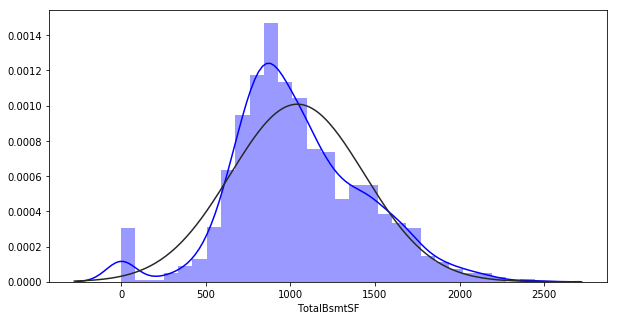

In [108]:
# We try to visualize without the values ​​greater than 5100, so as to include the only house of preds
# However, it is not said that removing these houses will improve the model
df = train.loc[train['TotalBsmtSF'] < 5100]
fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(10)
sns.distplot(df['TotalBsmtSF'], color="b", fit=norm, kde=True)

* We know that log1p optimizes normal LotArea, SalePrice, 1stFlrSF and GrLivArea, but certainly other improvements are possible
* TotalBsmtSF can be solved in the following way: by creating a new binary variable where 1 indicates that the house has the basement and 0 when it does not. Therefore, only the values ​​with basement greater than zero are left, trusting that this variable has the same weight as TotalBsmtSF = 0
* With the other features we can use StandardScaler, MinMax or normal transformation

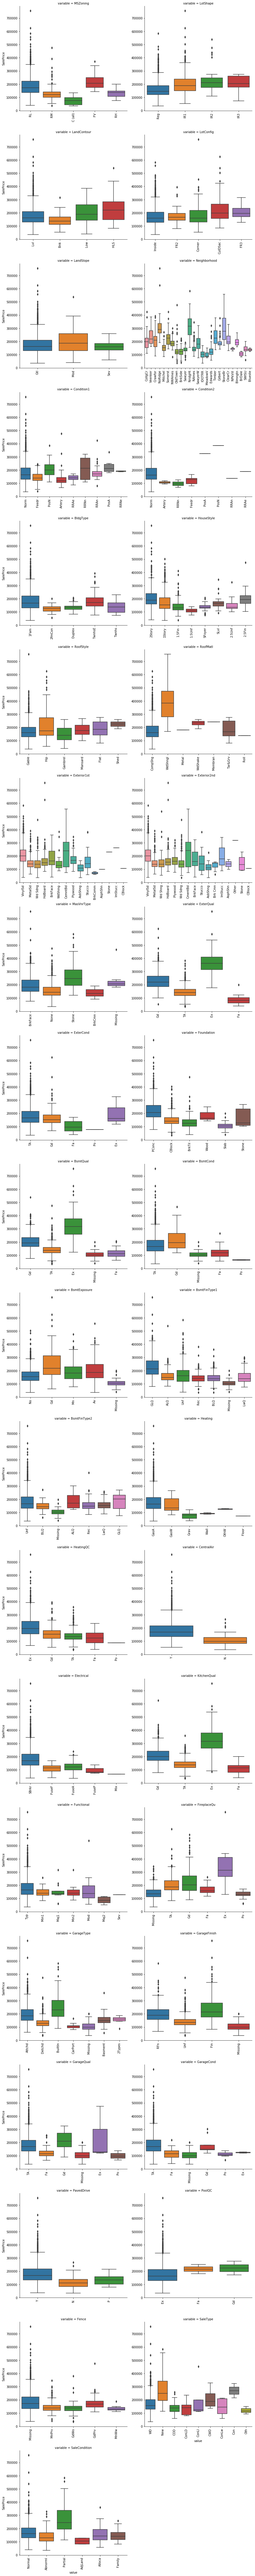

In [109]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    
    x=plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=Categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=6)
#train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, c='b')
#g=g.map(scatterplot,"value","SalePrice")
g = g.map(boxplot, "value", "SalePrice")

* Some categories seem to more diverse with respect to SalePrice than others.
* Neighborhood has big impact on house prices. 
* Most expensive seems to be Partial SaleCondition.
* Having pool on property seems to improve price substantially. 
* There are also differences in variabilities between category values.

### Statistics

Boxcox calcualate the proper lambda, which inverse or power. For example, if one variables have round(lambda) = 0, Log transform needed. And in round(lambda) = 2 case, the variable changed as variable^2. (It is useful in the range(-5,5). But some material said (-2,2) transformation is enough)



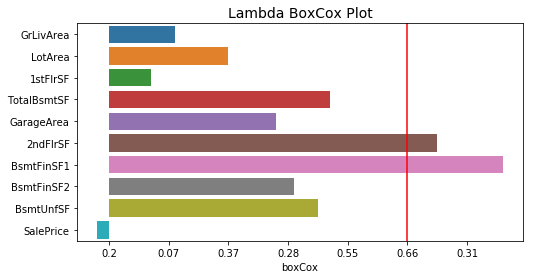

In [110]:
numNone = ['GrLivArea', 'LotArea', '1stFlrSF', 'TotalBsmtSF', 'GarageArea']
numZero = ['2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']
#season = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']
#numInt = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']
#etc = ['GarageCars', 'OpenPorchSF', 'Fireplaces', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

def tf(data):
    if min(data) <= 0:
        return data + abs(min(data)) + 1
    return data

def transformed(val):
    if val == 0: return 'log'
    elif val == 1: return 'stay'
    elif val == -1: return 'inverse'
    elif val <= -2: return 'square inverse'
    elif val >= 2: return 'square'


cols = numNone + numZero + ['SalePrice']
numZero_tf = dict()
#print(cols)

for col in cols:
    numZero_tf[col] = round(stats.boxcox_normmax(train[col].loc[train[col] != 0]),2)
   
test = pd.DataFrame.from_dict(numZero_tf, orient = 'index').T
test.rename(index = {0: 'boxCox'}, inplace = True)
f, ax = plt.subplots(1,1,figsize = (8,4))

sns.barplot(x = test.iloc[0,:], y = test.columns, orient = 'h')
ax.axvline(x=0.5, color = 'red')
ax.set_xticklabels(test.iloc[0,:])
ax.set_title('Lambda BoxCox Plot', fontsize = 14)
plt.show()

Except 2ndFlrSF, BsmtFinSF1, the other variables need to deal with by Log Transformation
Go to compare it!

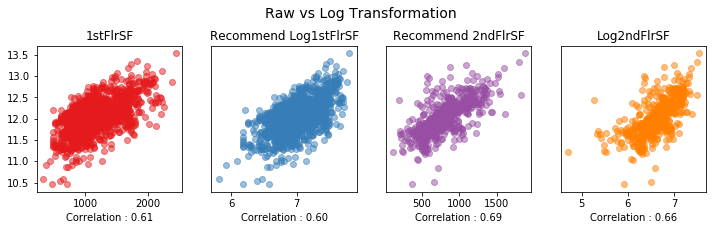

In [111]:
logTF = ['1stFlrSF', '2ndFlrSF']
train['logSalePrice'] = logPrice =  np.log1p(train['SalePrice'])
colors = sns.color_palette('Set1',8)
f, ax = plt.subplots(1, 4, figsize = (12, 3))
ax[0].set_title('1stFlrSF')
ax[0].scatter(train['1stFlrSF'], logPrice, c = colors[0], alpha = 0.5)
ax[1].set_title('Recommend Log1stFlrSF')
ax[1].scatter(np.log1p(train['1stFlrSF']),logPrice,  c = colors[1], alpha = 0.5)
ax[2].set_title('Recommend 2ndFlrSF')
indexL = train['2ndFlrSF']!= 0
ax[2].scatter(train['2ndFlrSF'].loc[indexL], train['logSalePrice'].loc[indexL], c = colors[3], alpha = 0.5)
ax[3].set_title('Log2ndFlrSF')
ax[3].scatter(np.log1p(train['2ndFlrSF'].loc[indexL]), train['logSalePrice'].loc[indexL],  c = colors[4], alpha = 0.5)
for ax_ in ax: 
    if ax_ != ax[0]: plt.setp(ax_, yticks=[])
plt.subplots_adjust(top = 0.8)
plt.suptitle('Raw vs Log Transformation', fontsize = 14)
val1 = np.corrcoef(train['1stFlrSF'], logPrice)[0][1]
val2 = np.corrcoef(np.log1p(train['1stFlrSF']), logPrice)[0][1]
val3 = np.corrcoef(train['2ndFlrSF'].loc[indexL], train['logSalePrice'].loc[indexL])[0][1]
val4 = np.corrcoef(np.log1p(train['2ndFlrSF'].loc[indexL]), train['logSalePrice'].loc[indexL])[0][1]
for ax_, val in zip(ax, [val1, val2, val3, val4]):
    ax_.set_xlabel('Correlation : %.2f' % val)
plt.show()

Recommend Log transformation of 1stFlrSF is worse than the prior. But it has an advantage to decrease the spreadness in the large 1stFlrSF area.
Even if Log2ndFlrSF is not recommend, the distribution has merit regard of a large 2ndFlrSF value.
Both of them has merit.

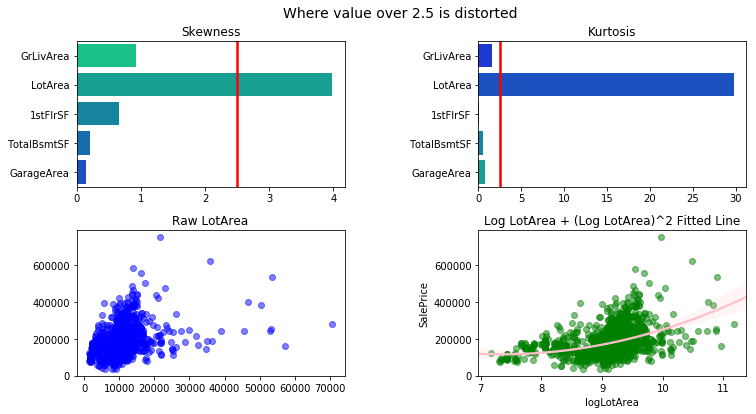

In [112]:
tmp = train[numNone].apply(lambda x : pd.Series({"skew" : x.skew(), "kurt" : x.kurt()}))
plt.figure(figsize = (12,6))
ax0 = plt.subplot2grid((2,2), (0,0))
sns.barplot(y=tmp.columns,x = tmp.loc['skew', :], orient = 'h',ax = ax0, palette = sns.color_palette('winter_r'))
ax0.axvline(x = 2.5, color = 'red', linewidth = 2.5)
ax0.set_title('Skewness')
ax0.set_xlabel('')
ax1 = plt.subplot2grid((2,2), (0,1))
sns.barplot(y=tmp.columns,x = tmp.loc['kurt', :], orient = 'h',ax = ax1, palette = sns.color_palette('winter'))
ax1.axvline(x = 2.5, color = 'red', linewidth = 2.5)
ax1.set_title('Kurtosis')
ax1.set_xlabel('')

ax2 = plt.subplot2grid((2,2), (1,0))
ax2.set_title('Raw LotArea')
ax2.scatter(train['LotArea'], train['SalePrice'], alpha = 0.5, color = 'b')
ax3 = plt.subplot2grid((2,2), (1,1))
ax3.set_title('Log LotArea + (Log LotArea)^2 Fitted Line')
train['logLotArea'] = np.log1p(train['LotArea'])
sns.regplot(x = 'logLotArea', y = 'SalePrice', order = 2, scatter_kws = {'color' : 'green', 'alpha' : 0.5}, 
            line_kws = {'color' : 'pink'}, data = train, ax = ax3)
train.drop('logLotArea', axis = 1, inplace = True)
plt.subplots_adjust(wspace = 0.5, hspace = 0.3, top = 0.9)
plt.suptitle('Where value over 2.5 is distorted', fontsize = 14)
plt.show()


#print("LotArea, Skewness %.2f Kurtosis %.2f" % (df_train['LotArea'].skew(),df_train['LotArea'].kurt()))
#print("LogLotArea, Skewness %.2f Kurtosis %.2f" % (scipy.stats.skew(np.log1p(df_train['LotArea'])),scipy.stats.kurtosis(np.log1p(df_train['LotArea']))))


* The meaning of high kurtosis value is most of value gathered in just one part
* LowArea was densed in low value Part
* Just Log_LotArea was not good variables, but with (Log_LotArea)^2, the fitted line w.r.t SalePrice was better

## Nonparameteric Test w.r.t Ordinal Variables


### Wilxoc-rank Sum test
Wilxoc-rank Sum test calculate the p-value on the hypothesis, two distribution has same distirbution. So if the p-value < p-criterion, then two distribution is useful to predict.

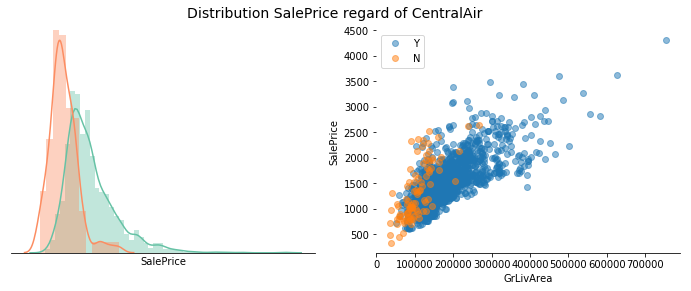

P_value : 0.00 SalePrice according to CentralAir was changed


In [113]:
f, ax = plt.subplots(1,2,figsize = (12,4))
colors = sns.color_palette('Set2',2)
sns.distplot(train['SalePrice'].loc[train.CentralAir == 'Y'], label = 'Yes', ax = ax[0], color = colors[0])
sns.distplot(train['SalePrice'].loc[train.CentralAir != 'Y'], label = 'No', ax = ax[0], color = colors[1])
ax[0].set_xticks([])
ax[0].set_yticks([])
sns.despine(left = True)
#ax[1].set_color_cycle(colors)
for val in ['Y', 'N']:
    ax[1].plot(train['SalePrice'].loc[train.CentralAir == val], train['GrLivArea'].loc[train.CentralAir == val], marker = 'o', linestyle = '', label = val, alpha = 0.5)
ax[1].set_xlabel('GrLivArea')
ax[1].set_ylabel('SalePrice')
ax[1].legend()
plt.subplots_adjust(top = 0.9)
plt.suptitle('Distribution SalePrice regard of CentralAir', fontsize = 14)
plt.show()
_, p_val = scipy.stats.ranksums(train['SalePrice'].loc[train.CentralAir == 'Y'], train['SalePrice'].loc[train.CentralAir != 'Y'])
if p_val > 0.05: print('P_value : %.2f SalePrice according to CentralAir was not changed %.2f' % p_val)
else: print('P_value : %.2f SalePrice according to CentralAir was changed' % p_val)

#### 3.3.2. Kruskal Will Test¶
Kruskal Will Test calculate the p-value that the null hypothesis does not indicate which of the groups differs. So if the p-value < p-criterion, then the variable was useful to predict.
* The Kruskal–Wallis test by ranks, Kruskal–Wallis H test (named after William Kruskal and W. Allen Wallis), or one-way ANOVA on ranks is a non-parametric method for testing whether samples originate from the same distribution


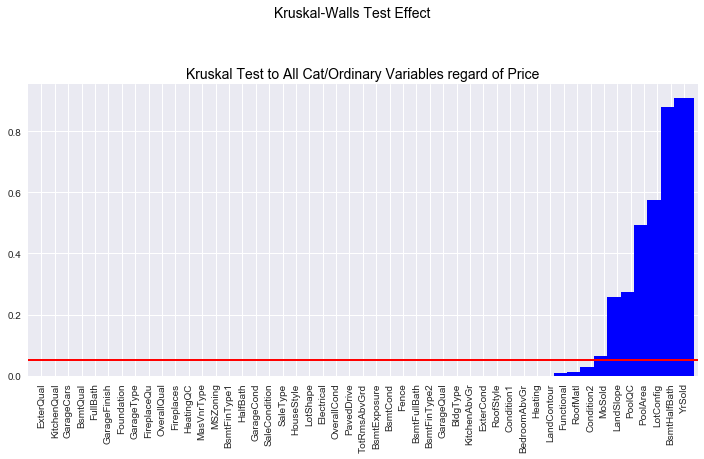

P-value 0.00 According to Fireplaces, SalePrice distribution changed
P-value 0.88 According to BsmtHalfBath, SalePrice distribution didn't changed


In [115]:
cols =  train.columns[(train.apply(pd.Series.nunique) < 15) & (train.apply(pd.Series.nunique) > 2 )]
def kruskal_pval(x, y = train['SalePrice']):
    a,b,c,*_= x.unique()
    _, p_val = scipy.stats.kruskal(y.loc[x == a], y.loc[x == b],y.loc[x == c])
    return p_val
p_val = train[cols].apply(kruskal_pval)
varSev = ['Fireplaces', 'BsmtHalfBath']

plt.style.use('seaborn')
plt.figure(figsize = (12,6))
#f.patch.set_facecolor('green')


p_val.sort_values().plot.bar( width= 1.5, color = 'b')
plt.axhline(y = 0.05, color = 'red', linewidth = 2) #95%
plt.title('Kruskal Test to All Cat/Ordinary Variables regard of Price', fontsize = 14, color = 'k')
plt.subplots_adjust(top = 0.8, hspace = 0.5)
plt.suptitle('Kruskal-Walls Test Effect', fontsize = 14, color = 'k')

plt.show()
for var in varSev:
    a,b,c, *_  = train[var].unique()
    _, p_val = scipy.stats.kruskal(train['SalePrice'].loc[train[var] == a], train['SalePrice'].loc[train[var] == b],train['SalePrice'].loc[train[var] == c])
    if p_val < 0.05: print(('P-value %.2f According to ' + str(var) + ', SalePrice distribution changed') % p_val)
    else: print(('P-value %.2f According to ' + str(var) + ", SalePrice distribution didn't changed") % p_val)
#train.drop(['MoSold', 'PoolQC', 'PoolArea',  'LandSlope', 'LotConfig', 'BsmtHalfBath', 'YrSold'], axis = 1, inplace = True)


* Fireplaces is good at predicting SalePrice, but Bsmt is bad what we had seen
* Most of Variable are useful, ecept MoSold, PoolQC, PoolArea, LandSlope, LotConfig, BmstHalfBath, YrSold

## Corelation

In [116]:
focus_cols = ['SalePrice']

print(train.corr(method='pearson').filter(focus_cols).drop(focus_cols).sort_values(focus_cols,ascending=False).head(10))

              SalePrice
logSalePrice   0.952631
OverallQual    0.799109
GrLivArea      0.727218
GarageCars     0.648424
GarageArea     0.637946
TotalBsmtSF    0.632441
1stFlrSF       0.613275
FullBath       0.563232
YearBuilt      0.534168
TotRmsAbvGrd   0.530176


* important factors to predict Sale Price are quality,Living Area,Garage and  bathrooms and year renovated

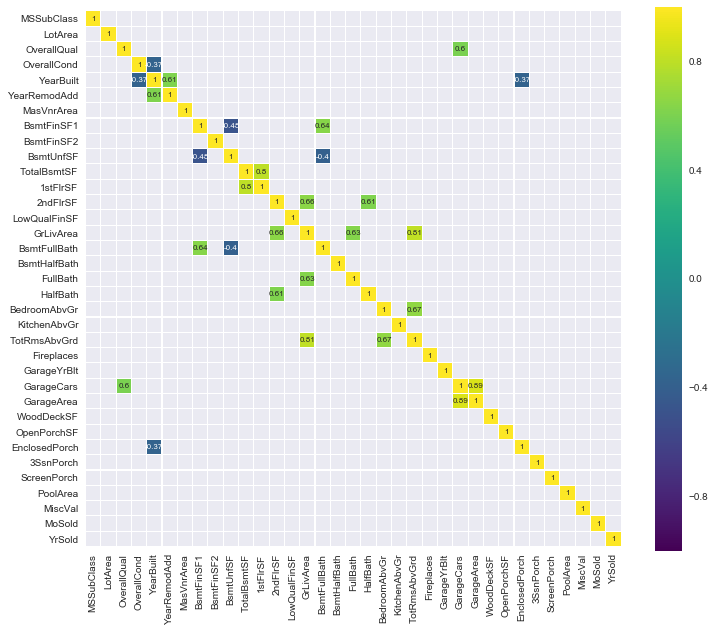

In [117]:
numf = full.filter(numerical_feature, axis=1)
corr = numf.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.3)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

* A lot of features seems to be correlated between each other but some of them such as **YearBuild/GarageYrBlt** may just indicate a price inflation over the years.
* As for **1stFlrSF/TotalBsmtSF**, it is normal that the more the 1st floor is large (considering many houses have only 1 floor), the more the total basement will be large.

* Now for the ones which are less obvious we can see that:

* There is a strong **negative correlation** between **BsmtUnfSF (Unfinished square feet of basement area) and BsmtFinSF2 (Type 2 finished square feet)**. There is a definition of unfinished square feet here but as for a house of "Type 2", I can't tell what it really is.


* similar to basement and garage .. above ground variab le have relation

* living area is realetecd to all area related variabele and no of rooms/bathrooms 

* year built vs area 
* yer built vs condition


* **HalfBath/2ndFlrSF** is interesting and may indicate that people gives an importance of not having to rush downstairs in case of urgently having to go to the bathroom (I'll consider that when I'll buy myself a house uh...)

* There is of course a lot more to discover but I can't really explain the rest of the features except the most obvious ones.

* We can conclude that, by essence, some of those features may be combined between each other in order to reduce the number of features **(1stFlrSF & TotalBsmtSF, GarageCars & GarageArea)** and others indicates that people expect multiples features to be packaged together.

*  might get more information after one hot encoding



### Plot important fature co-relation  matrix

In [118]:
num_fea2 = ['LotArea','BsmtFinSF1','OpenPorchSF','OverallQual','YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 
            'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea','SalePrice']

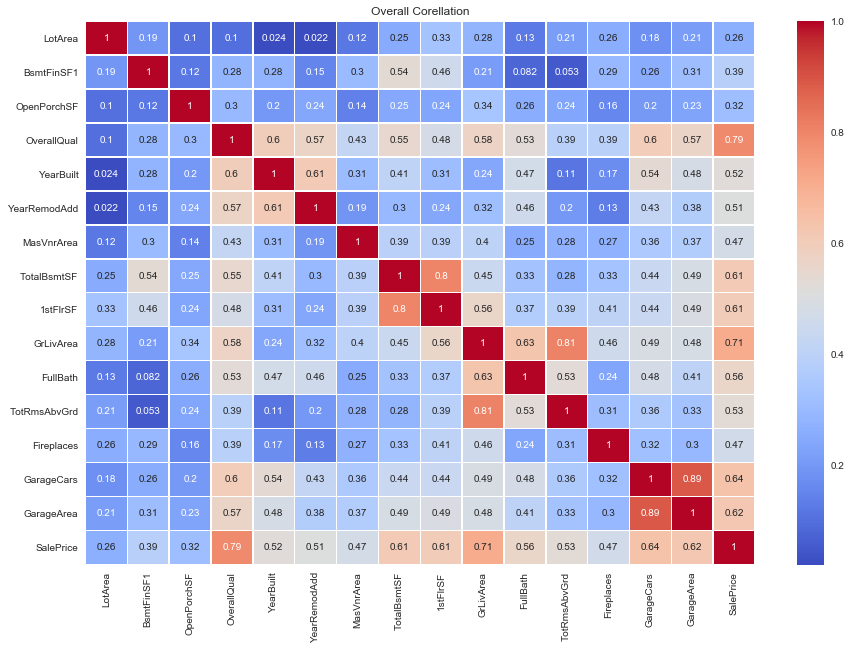

In [119]:
def heatmap():
    heat_df = full[num_fea2]
    corr = heat_df.corr()
    plt.figure(figsize=(15,10))
    plt.title('Overall Corellation')
    sns.heatmap(corr, annot=True, linewidths=0.5, cmap = 'coolwarm') 
heatmap()

### Feature Engineering

* many time as seen above specially after 1950 most house has no renovation thus yearbult = year renovated thus lets try to create feature which signify cmbination of two

In [120]:
p = train[['YearBuilt','YearRemodAdd','SalePrice']]
print(p.corr())
#print("-------------------------------------------------------")
train['YearBuiltemodel']=(train['YearBuilt']+train['YearRemodAdd'])
p = train[['YearBuilt','YearRemodAdd','YearBuiltemodel','SalePrice']]
print(p.corr())
# ok good

              YearBuilt  YearRemodAdd  SalePrice
YearBuilt      1.000000      0.591550   0.534168
YearRemodAdd   0.591550      1.000000   0.521317
SalePrice      0.534168      0.521317   1.000000
                 YearBuilt  YearRemodAdd  YearBuiltemodel  SalePrice
YearBuilt         1.000000      0.591550         0.930929   0.534168
YearRemodAdd      0.591550      1.000000         0.845141   0.521317
YearBuiltemodel   0.930929      0.845141         1.000000   0.590277
SalePrice         0.534168      0.521317         0.590277   1.000000


* clearly new feature diliver more inforamtion than them indivaiually

* Also when a person buy a home one of important total surface area, lets create a feature for it

In [121]:
p = train[['TotalBsmtSF','1stFlrSF','2ndFlrSF','SalePrice']]
print(p.corr())
print("-------------------------------------------------------")
train['TotalSF']=(train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'])
p = train[['TotalBsmtSF','1stFlrSF','2ndFlrSF','TotalSF','SalePrice']]
print(p.corr())


             TotalBsmtSF  1stFlrSF  2ndFlrSF  SalePrice
TotalBsmtSF     1.000000  0.794622 -0.209140   0.632441
1stFlrSF        0.794622  1.000000 -0.234739   0.613275
2ndFlrSF       -0.209140 -0.234739  1.000000   0.333395
SalePrice       0.632441  0.613275  0.333395   1.000000
-------------------------------------------------------
             TotalBsmtSF  1stFlrSF  2ndFlrSF   TotalSF  SalePrice
TotalBsmtSF     1.000000  0.794622 -0.209140  0.791568   0.632441
1stFlrSF        0.794622  1.000000 -0.234739  0.765336   0.613275
2ndFlrSF       -0.209140 -0.234739  1.000000  0.361128   0.333395
TotalSF         0.791568  0.765336  0.361128  1.000000   0.826080
SalePrice       0.632441  0.613275  0.333395  0.826080   1.000000


* indeed it diliver alot more corelation

* we can perform similar ogic for basement , bathrooms, porch, and finished total square feet  

In [122]:
p = train[['BsmtUnfSF','BsmtFinSF2','SalePrice']]
print(p.corr())
print("-------------------------------------------------------")
train['basement']=train['BsmtFinSF2']+train['BsmtUnfSF']
p = train[['BsmtUnfSF','BsmtFinSF2','basement','SalePrice']]
print(p.corr())


            BsmtUnfSF  BsmtFinSF2  SalePrice
BsmtUnfSF    1.000000   -0.212856   0.220720
BsmtFinSF2  -0.212856    1.000000  -0.031506
SalePrice    0.220720   -0.031506   1.000000
-------------------------------------------------------
            BsmtUnfSF  BsmtFinSF2  basement  SalePrice
BsmtUnfSF    1.000000   -0.212856  0.933428   0.220720
BsmtFinSF2  -0.212856    1.000000  0.151857  -0.031506
basement     0.933428    0.151857  1.000000   0.211709
SalePrice    0.220720   -0.031506  0.211709   1.000000


In [123]:
train['Total_sqr_footage'] = (train['BsmtFinSF1'] + train['BsmtFinSF2'] + train['1stFlrSF'] + train['2ndFlrSF'])

train['Total_Bathrooms'] = (train['FullBath'] + (0.5 * train['HalfBath']) + train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath']))

train['Total_porch_sf'] = (train['OpenPorchSF'] + train['3SsnPorch'] + train['EnclosedPorch'] + train['ScreenPorch'] +
                              train['WoodDeckSF'])


* As Discussed above we will create a feature which would signify presence of some set of feature

In [124]:
train['haspool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['has2ndfloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasgarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['hasbsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['hasfireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)